In [1]:
import os

import numpy as np
import seaborn as sns

In [2]:
data_path = 'data/'
tasks = ['PEMS03', 'PEMS04', 'PEMS07', 'PEMS08']
meta_data = ['d03_text_meta.txt', 'd04_text_meta.txt', 'd07_text_meta.txt', 'd08_text_meta.txt']
np.random.seed(42)

In [3]:
for task in tasks:
    data = np.load(data_path + os.sep + task + os.sep + task + '.npz')
    print(data['data'].shape)

(26208, 358, 1)
(16992, 307, 3)
(28224, 883, 1)
(17856, 170, 3)


In [4]:
# keep flow
for task in tasks:
    data = np.load(data_path + os.sep + task + os.sep + task + '.npz')
    np.savez(data_path + os.sep + task + os.sep + task + '_flow.npz', data=data['data'][:, :, 0])

In [5]:
# recheck
for task in tasks:
    data = np.load(data_path + os.sep + task + os.sep + task + '_flow.npz')
    print(data['data'].shape)

(26208, 358)
(16992, 307)
(28224, 883)
(17856, 170)


state:  102


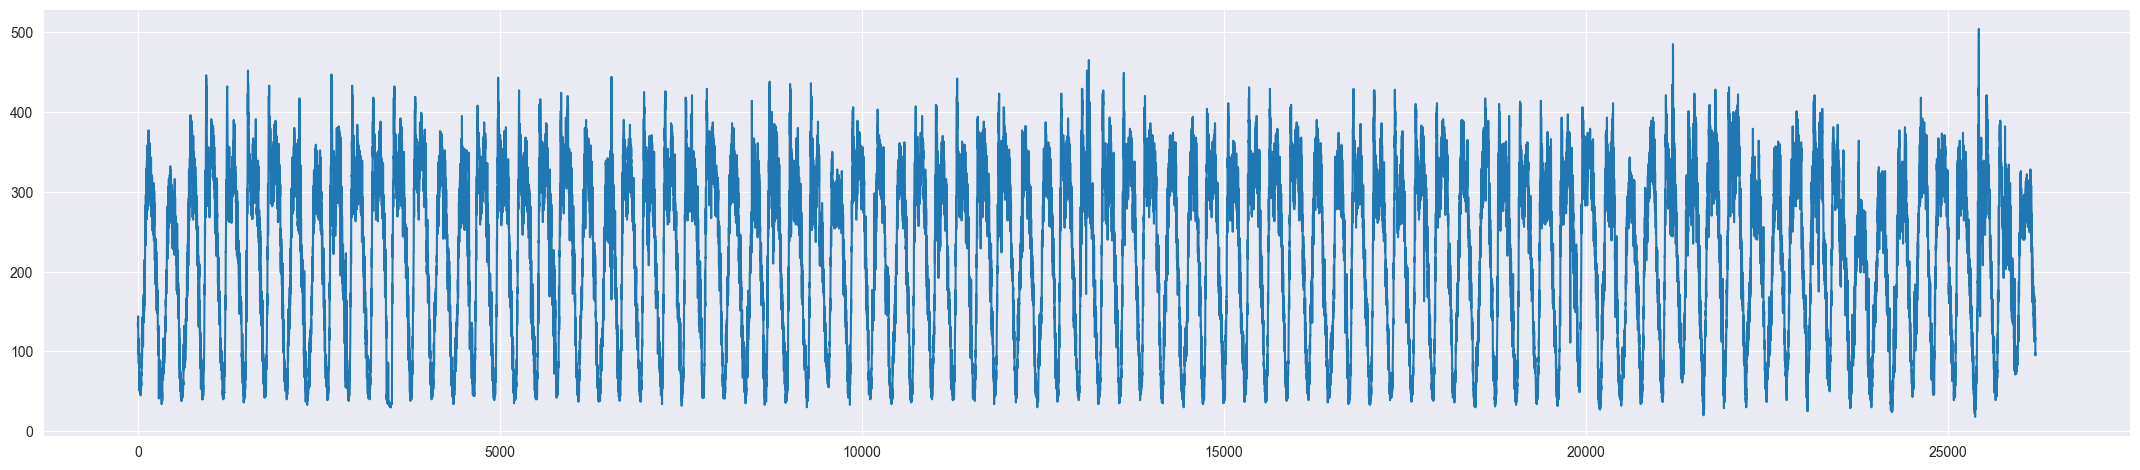

In [6]:
task = 'PEMS03'
data = np.load(data_path + os.sep + task + os.sep + task + '_flow.npz')
state = np.random.randint(0, data['data'].shape[1])
print('state: ', state)
rel = sns.relplot(x=range(data['data'].shape[0]), y=data['data'][:, state], kind='line')
rel.figure.set_size_inches(25, 5)

In [7]:
day_steps = 288
week_steps = 288 * 7
month_steps = 288 * 30

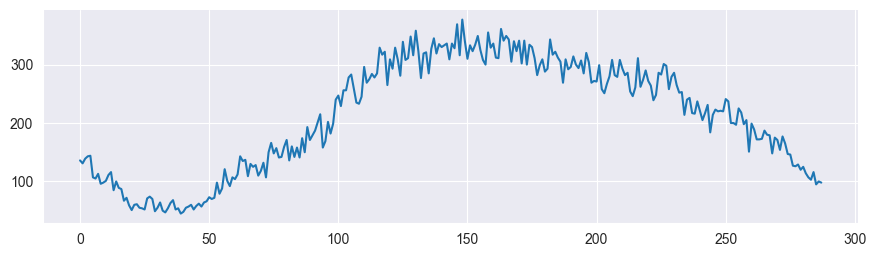

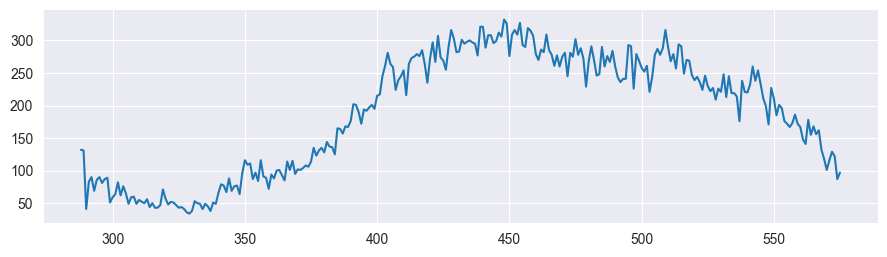

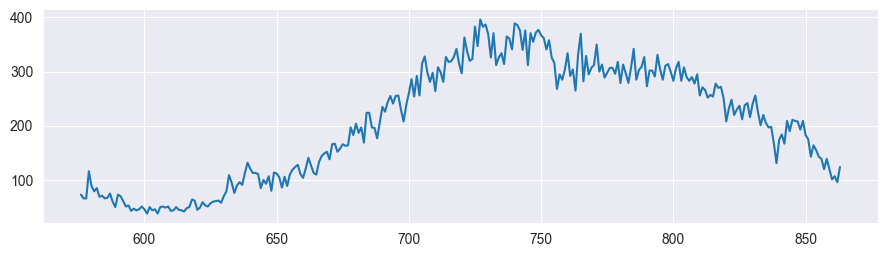

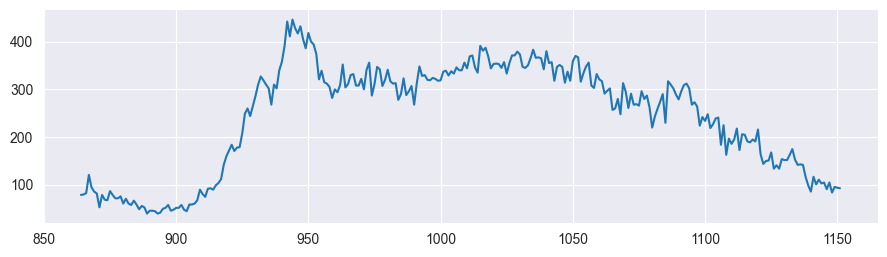

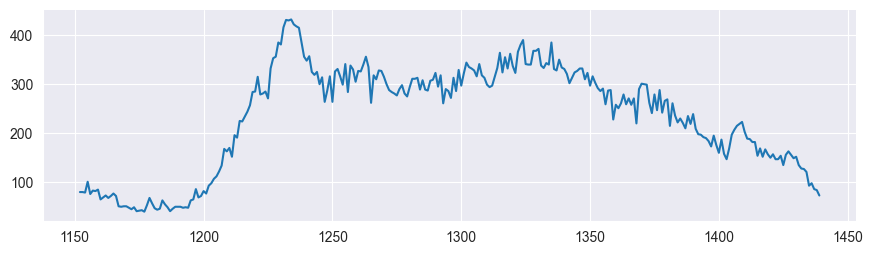

In [8]:
n = 5
for i in range(n):
    rel = sns.relplot(x=range(day_steps * i, day_steps * (i + 1)), y=data['data'][day_steps * i:day_steps * (i + 1), state], kind='line')
    rel.figure.set_size_inches(10, 2.5)

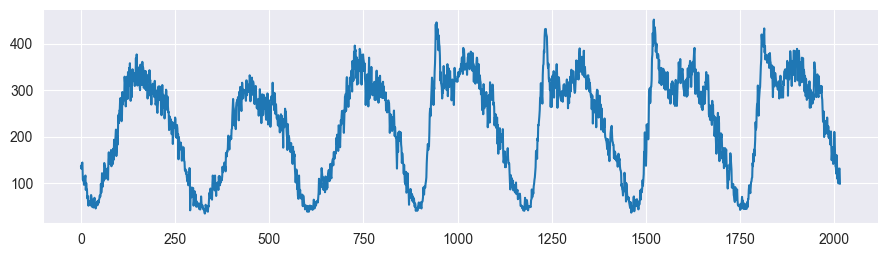

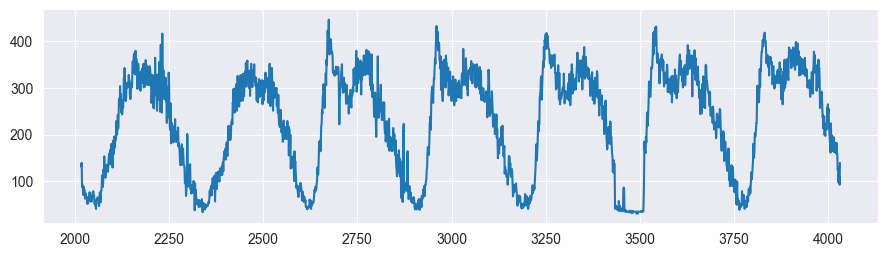

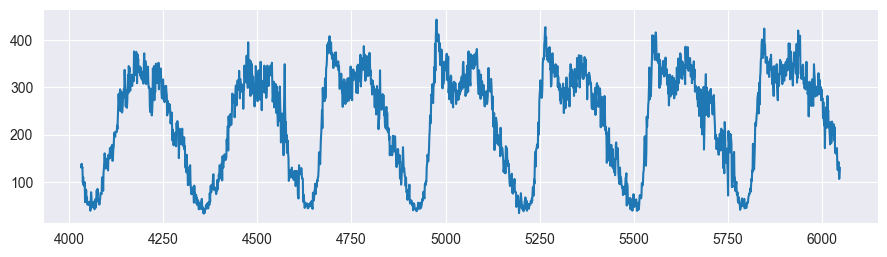

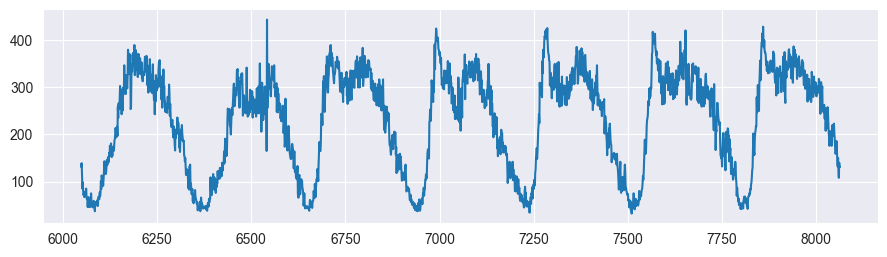

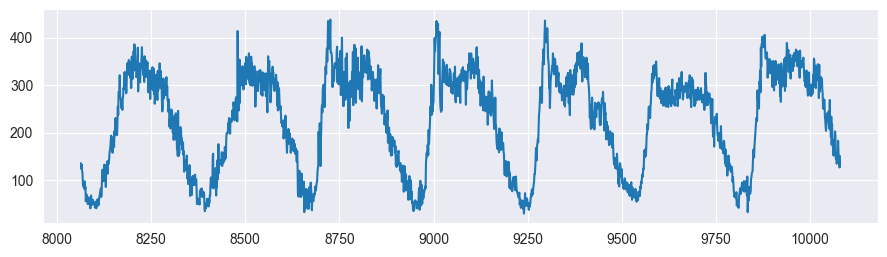

In [9]:
n = 5
for i in range(n):
    rel = sns.relplot(x=range(week_steps * i, week_steps * (i + 1)), y=data['data'][week_steps * i:week_steps * (i + 1), state], kind='line')
    rel.figure.set_size_inches(10, 2.5)

In [10]:
# Aggregation
data_day = np.zeros((data['data'].shape[0] // day_steps, data['data'].shape[1]))
for i in range(data['data'].shape[0] // day_steps):
    data_day[i] = np.sum(data['data'][day_steps * i:day_steps * (i + 1)], axis=0)
# shape
print(data_day.shape)

(91, 358)


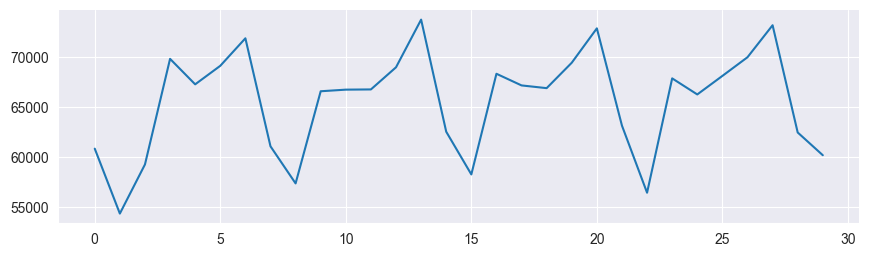

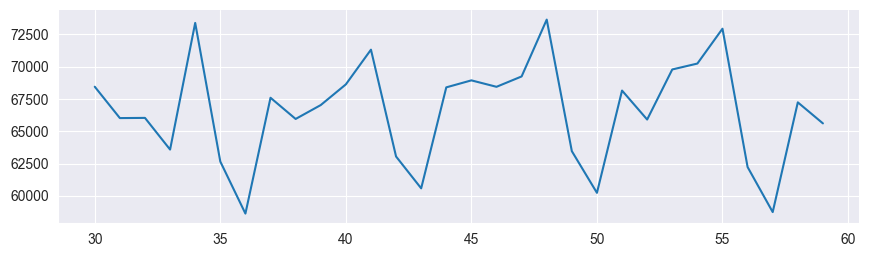

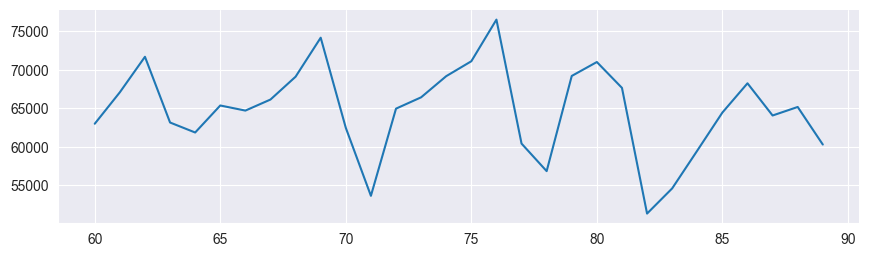

In [11]:
n = 3
month_steps_day = month_steps // day_steps
# 3 months
for i in range(n):
    rel = sns.relplot(x=range(month_steps_day * i, month_steps_day * (i + 1)), y=data_day[month_steps_day * i:month_steps_day * (i + 1), state], kind='line')
    rel.figure.set_size_inches(10, 2.5)

In [17]:
import pandas as pd
import csv

# adj process
for task in tasks:
    dis_data = data_path + os.sep + task + os.sep + task + '.csv'
    flow_data = np.load(data_path + os.sep + task + os.sep + task + '_flow.npz')
    adj = np.zeros((flow_data['data'].shape[1], flow_data['data'].shape[1]), dtype=np.float32)
    adj_dis = np.zeros((flow_data['data'].shape[1], flow_data['data'].shape[1]), dtype=np.float32)
    dis_data_df = pd.read_csv(dis_data)
    print("task: ", task, "  edge num: ", len(dis_data_df[dis_data_df.columns[0]].tolist()),
          "  node num: ", flow_data['data'].shape[1])
    if task == 'PEMS03':
        with open(data_path + os.sep + task + os.sep + task + '.txt', 'r') as f:
            id_dict = {int(i): idx
                       for idx, i in enumerate(f.read().strip().split('\n'))}
        with open(dis_data, 'r') as f:
            f.readline()
            reader = csv.reader(f)
            for row in reader:
                if len(row) != 3:
                    continue
                adj[id_dict[int(row[0])]][id_dict[int(row[1])]] = 1
                adj_dis[id_dict[int(row[0])]][id_dict[int(row[1])]] = row[2]
    else:
        with open(dis_data, 'r') as f:
            f.readline()
            reader = csv.reader(f)
            for row in reader:
                if len(row) != 3:
                    continue
                adj[int(row[0])][int(row[1])] = 1
                adj_dis[int(row[0])][int(row[1])] = row[2]
    
    np.savez(data_path + os.sep + task + os.sep + task + '_adj.npz', adj=adj)
    np.savez(data_path + os.sep + task + os.sep + task + '_adj_dis.npz', adj=adj_dis)


task:  PEMS03   edge num:  547   node num:  358
task:  PEMS04   edge num:  340   node num:  307
task:  PEMS07   edge num:  866   node num:  883
task:  PEMS08   edge num:  295   node num:  170
error:  153 62
error:  95 98
error:  45 93
error:  124 169
error:  169 7
error:  133 91
error:  91 163
error:  150 71
error:  71 61
error:  65 72
error:  72 48
error:  8 42
error:  42 117
error:  90 132
error:  78 107
error:  107 46
error:  118 145
error:  145 96


In [16]:
# node: N
# step: T
# {task}_flow.npz (T, N)
# {task}_adj.npz (N, N)
# {task}_adj_dis.npz (N, N)
for task in tasks:
    data = np.load(data_path + os.sep + task + os.sep + task + '_flow.npz')
    adj = np.load(data_path + os.sep + task + os.sep + task + '_adj.npz')
    adj_dis = np.load(data_path + os.sep + task + os.sep + task + '_adj_dis.npz')
    print(task, data['data'].shape, adj['adj'].shape, adj_dis['adj'].shape)

PEMS03 (26208, 358) (358, 358) (358, 358)
PEMS04 (16992, 307) (307, 307) (307, 307)
PEMS07 (28224, 883) (883, 883) (883, 883)
PEMS08 (17856, 170) (170, 170) (170, 170)


In [ ]:
# Done for data process